In [1]:
# Import the necessary libraries.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Read the csv file.
sales_data=pd.read_csv('all_data.csv')
sales_data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:

# Get the info of dataframe.
sales_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


# Clean up the data

In [4]:

#Check if the data frame has any null values.
sales_data.isnull().values.any()



True

In [5]:
#Check the null values in each column.
sales_data.isnull().sum()


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
#Remove the null values.
sales_data=sales_data.dropna()


In [7]:
#Get rid of text in the order date column.
sales_data=sales_data[sales_data['Order Date'].str[0:2]!="Or"]


In [8]:
#Change columns data type from object to int.
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])


# Expand data with additional columns

In [11]:
#Add month column
sales_data["Month"]=sales_data['Order Date'].str[0:2]


In [10]:
#Change columns data type from str  to int64.
sales_data["Month"]=pd.to_numeric(sales_data["Month"]) 

In [12]:
#Change columns data type from int64  to int32.
sales_data["Month"]=sales_data["Month"].astype('int32')

In [13]:
#Create ‘Year’ column using panda to_datetime:
sales_data['Year'] = pd.to_datetime(sales_data['Order Date']).dt.year

In [14]:
#Check the uniques values in Year:
sales_data['Year'].value_counts()

2019    185916
2020        34
Name: Year, dtype: int64

In [15]:
#Add city column: Los Angeles (CA)
def get_city(address):
    return address.split(",")[1].strip(" ")
 
def get_state(address):
    return address.split(",")[2].split(" ")[1]
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,Los Angeles (CA)


In [16]:
#Make sales column:
sales_data['Sales'] = sales_data['Quantity Ordered']* sales_data['Price Each']


# Data Exploration

## Question 1: What was the best month for sales? How much was earned that month?

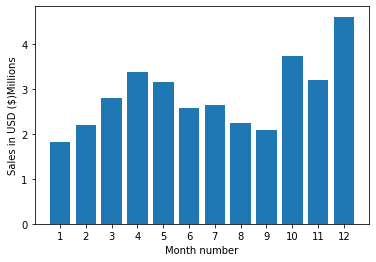

In [20]:
#Creating sales column
sales_data['Sales'] = sales_data['Quantity Ordered']* sales_data['Price Each']

#check the type
type(sales_data["Sales"].iloc[0])

#Apply groupby to check the total sales in each month
sales_data.groupby(['Month'])['Sales'].sum()

#A bar graph 
import matplotlib.pyplot as plt
#Getting indexes as keys
keys = [Month for Month, df in sales_data.groupby(['Month'])]
salesinMillion=sales_data.groupby(['Month'])['Sales'].sum()/1000000

plt.bar(keys,salesinMillion)
plt.xticks(keys)
plt.ylabel('Sales in USD ($)Millions')
plt.xlabel('Month number')
plt.show()




### Conclusion:
In December we got the highest sales.

## Question 2: What city sold the most product?

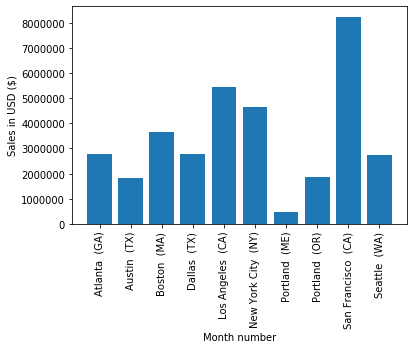

In [22]:
#Apply groupby to check the total sales in each city
sales_data.groupby(['City'])["Sales"].sum()

#A bar graph 
import matplotlib.pyplot as plt

keys = [city for city, df in sales_data.groupby(['City'])]

plt.bar(keys,sales_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical')
plt.show()


### Conclusion: 
San Francisco sold the most products.

## Question 3:What time should we display advertisements to maximize likelihood of customer's buying products?


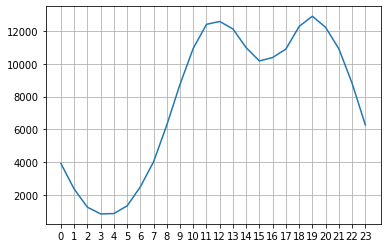

In [25]:
sales_data['Hour'] = pd.to_datetime(sales_data['Order Date']).dt.hour
sales_data['Minute'] = pd.to_datetime(sales_data['Order Date']).dt.minute
sales_data['Count'] = 1
sales_data.head()

sales_data.groupby(['Hour'])['Count'].sum()

keys = [pair for pair, df in sales_data.groupby(['Hour'])]

plt.plot(keys, sales_data.groupby(['Hour']).sum()['Count'])
plt.xticks(keys,size=10)
plt.grid()
plt.show()


### Conclusion: 
My recommendation is slightly before 11am or 7pm.